## Introduction

Trigger questions for the exploratory data analysis:

1. How many hotels do we have in the dataset?
2. From which countries are the reviewed hotels?
3. How many reviews does each hotel have?
4. What percentage of reviews have a score higher than 5?
5. Which kinds of guests are there?
6. Where are reviewers from? Is there any nation-specific behaviour?
7. What information do we have regarding dates?
8. Which hotel would you recommend to a couple on vacation?

## Data preprocessing

### Import libraries and dataset

In [0]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline 
sns.set(color_codes=True)

In [0]:
# Import csv
df = pd.read_csv('hotel_reviews_enriched.csv')

### Have a first look at the data

In [0]:
df.head(5)

,id,Hotel_Name,Hotel_Address,Hotel_Country,Hotel_State,Hotel_City,Hotel_lat,Hotel_lng,Businesses_100m,Businesses_1km,...,Reviewer_Country,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Average_Score,Reviewer_Score,Total_Number_of_Reviews_Reviewer_Has_Given,Additional_Number_of_Scoring,Submitted_from_Mobile
0,13,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,...,NaN,I am so angry that i made this post available ...,397,Only the park outside of the hotel was beautiful,11,8,3,7,194,0
1,14,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,...,IE,No Negative,0,No real complaints the hotel was great great l...,105,8,8,7,194,0
2,15,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,...,AU,Rooms are nice but for elderly a bit difficult...,42,Location was good and staff were ok It is cute...,21,8,7,9,194,1
3,16,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,...,GB,My room was dirty and I was afraid to walk bar...,210,Great location in nice surroundings the bar an...,26,8,4,1,194,0
4,17,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,NL,NH,Amsterdam,52.360576,4.915968,6.0,429.0,...,NZ,You When I booked with your company on line yo...,140,Amazing location and building Romantic setting,8,8,7,3,194,1


What columns do we have?

In [0]:
df.columns

Index(['id', 'Hotel_Name', 'Hotel_Address', 'Hotel_Country', 'Hotel_State',
       'Hotel_City', 'Hotel_lat', 'Hotel_lng', 'Businesses_100m',
       'Businesses_1km', 'Businesses_5km', 'Room_Type', 'Room_Type_Level',
       'Bed_Type', 'Tags', 'Guest_Type', 'Trip_Type', 'Stay_Duration',
       'Review_Date', 'Day_of_Week', 'Day_of_Year', 'Days_Since_Review',
       'Week_of_Month', 'Week_of_Year', 'Is_Hotel_Holiday',
       'Is_Reviewer_Holiday', 'Quarter_of_Year', 'Total_Number_of_Reviews',
       'Review_Is_Positive', 'Review_Positivity_Rate', 'Reviewer_Nationality',
       'Reviewer_Country', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Positive_Review',
       'Review_Total_Positive_Word_Counts', 'Average_Score', 'Reviewer_Score',
       'Total_Number_of_Reviews_Reviewer_Has_Given',
       'Additional_Number_of_Scoring', 'Submitted_from_Mobile'],
      dtype='object')

How many reviews do we have in total?

In [0]:
df.shape

(515738, 41)

What datatypes do we have?

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 41 columns):
id                                            515738 non-null int64
Hotel_Name                                    515738 non-null object
Hotel_Address                                 515738 non-null object
Hotel_Country                                 515738 non-null object
Hotel_State                                   512470 non-null object
Hotel_City                                    515738 non-null object
Hotel_lat                                     512470 non-null float64
Hotel_lng                                     512470 non-null float64
Businesses_100m                               512470 non-null float64
Businesses_1km                                512470 non-null float64
Businesses_5km                                512470 non-null float64
Room_Type                                     515468 non-null object
Room_Type_Level                               184561 non-

### Check for inconsistencies

Are there any duplicates?

In [0]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 41)


And null values?

In [0]:
# Finding the null values.
print(df.isnull().sum())

id                                                 0
Hotel_Name                                         0
Hotel_Address                                      0
Hotel_Country                                      0
Hotel_State                                     3268
Hotel_City                                         0
Hotel_lat                                       3268
Hotel_lng                                       3268
Businesses_100m                                 3268
Businesses_1km                                  3268
Businesses_5km                                  3268
Room_Type                                        270
Room_Type_Level                               331177
Bed_Type                                       85376
Tags                                               0
Guest_Type                                         0
Trip_Type                                       1656
Stay_Duration                                    151
Review_Date                                   

## Data analysis

### 1. How many hotels do we have in the dataset?

In [0]:
#Number of Hotels
n_hotels = df["Hotel_Name"].nunique()
print(f"On the dataset we have reviews from {n_hotels} hotels")

On the dataset we have reviews from 1492 hotels


### 2. From which countries are the reviewed hotels?

In [0]:
hotels_by_country = df.groupby("Hotel_Country")["Hotel_Name"].nunique()

In [0]:
hotels_by_country

Hotel_Country
AT    158
ES    211
FR    458
GB    400
IT    162
NL    105
Name: Hotel_Name, dtype: int64

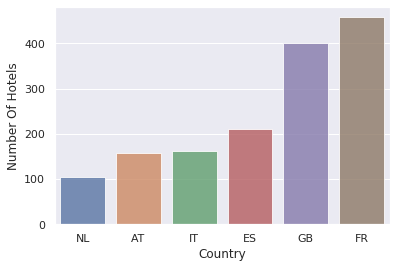

In [0]:
hotels_by_country = hotels_by_country.sort_values()
sns.barplot(hotels_by_country.index, hotels_by_country.values, alpha=0.8)
plt.ylabel("Number Of Hotels")
plt.xlabel("Country")
plt.show()

### 3. How many reviews does each hotel have?

In [0]:
reviews_by_hotel= df.groupby("Hotel_Name")["id"].count()

In [0]:
reviews_by_hotel = pd.DataFrame(reviews_by_hotel)

In [0]:
reviews_by_hotel = reviews_by_hotel.reset_index().rename(columns = {"id": "n_reviews"})

In [0]:
reviews_by_hotel

,Hotel_Name,n_reviews
0,11 Cadogan Gardens,159
1,1K Hotel,148
2,25hours Hotel beim MuseumsQuartier,689
3,41,103
4,45 Park Lane Dorchester Collection,28
...,...,...
1487,citizenM London Bankside,1517
1488,citizenM London Shoreditch,838
1489,citizenM Tower of London,1683
1490,every hotel Piccadilly,568


In [0]:
df = pd.merge(df, reviews_by_hotel, on = "Hotel_Name" )

In [0]:
df[["Hotel_Name", "n_reviews", "Total_Number_of_Reviews"]]

,Hotel_Name,n_reviews,Total_Number_of_Reviews
0,Hotel Arena,405,1403
1,Hotel Arena,405,1403
2,Hotel Arena,405,1403
3,Hotel Arena,405,1403
4,Hotel Arena,405,1403
...,...,...,...
515733,Atlantis Hotel Vienna,325,2823
515734,Atlantis Hotel Vienna,325,2823
515735,Atlantis Hotel Vienna,325,2823
515736,Atlantis Hotel Vienna,325,2823


### 4. What percentage of reviews have a score higher than 5?

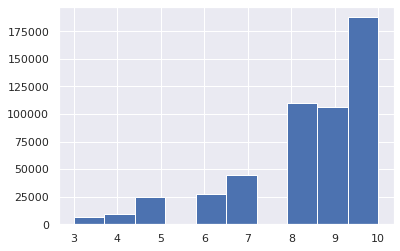

In [0]:
df["Reviewer_Score"].hist()

In [0]:
df["Reviewer_Score_greater_5"] = np.where(df["Reviewer_Score"]>5, 1,0)

In [0]:
df.groupby("Reviewer_Score_greater_5").size()

Reviewer_Score_greater_5
0     40229
1    475509
dtype: int64

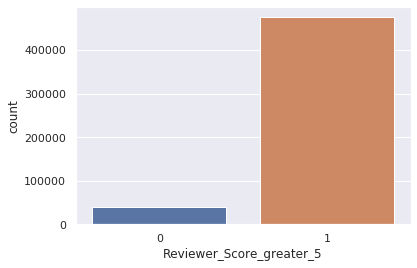

In [0]:
#Plot reviews 
g = sns.countplot(data=df, x="Reviewer_Score_greater_5")
g.set_title="Is review positive?"
plt.show()

In [0]:
#in % how many reviews where positive and negative?
100*df["Reviewer_Score_greater_5"].value_counts()/len(df)

1    92.199722
0     7.800278
Name: Reviewer_Score_greater_5, dtype: float64

### 5. Which kinds of guests are there?

In [0]:
df.groupby("Guest_Type").size()

Guest_Type
Couple                        251554
Family with older children     26258
Family with young children     60791
Group                          65392
Solo traveler                 108336
Travelers with friends          2143
With a pet                      1264
dtype: int64

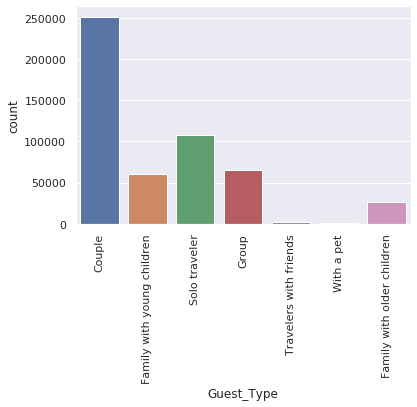

In [0]:
#Plot number of reviews by guest type 
g = sns.countplot(data=df, x="Guest_Type")
g.set_title="Guests by type"
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

### 6. Where are reviewers from? Is there any nation-specific behaviour?

In [0]:
reviews_by_nationality = df.groupby("Reviewer_Nationality").size().to_frame("size")

In [0]:
reviews_by_nationality.reset_index()

,Reviewer_Nationality,size
0,Abkhazia Georgia,153
1,Afghanistan,8
2,Albania,286
3,Algeria,100
4,American Samoa,2
...,...,...
221,Vietnam,187
222,Wallis and Futuna,2
223,Yemen,16
224,Zambia,37


In [0]:
reviews_by_nationality["size"].describe()

count       226.000000
mean       2279.712389
std       16580.589229
min           1.000000
25%           8.000000
50%          59.500000
75%         930.500000
max      245246.000000
Name: size, dtype: float64

In [0]:
top_nationality_reviewers= reviews_by_nationality.sort_values("size", ascending= False).head(5).reset_index()

In [0]:
top_nationality_reviewers

,Reviewer_Nationality,size
0,United Kingdom,245246
1,United States of America,35437
2,Australia,21686
3,Ireland,14827
4,United Arab Emirates,10235


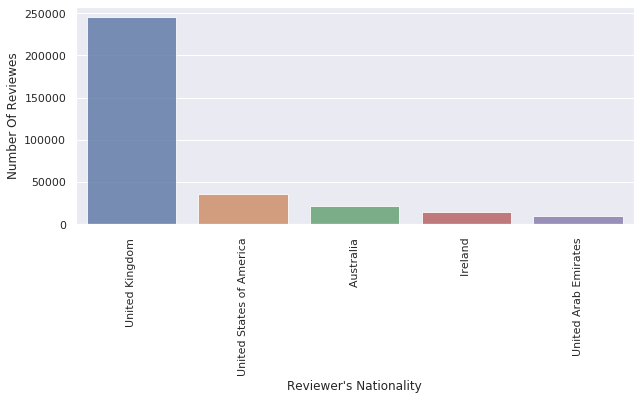

In [0]:
#Plot number of reviews by reviewers nationality
plt.figure(figsize=(10,4))
p = sns.barplot(top_nationality_reviewers["Reviewer_Nationality"], top_nationality_reviewers["size"], alpha=0.8)
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.ylabel("Number Of Reviewes")
plt.xlabel("Reviewer's Nationality")
plt.show()

In [0]:
list_top_nationalities = top_nationality_reviewers["Reviewer_Nationality"].unique()

[Text(0, 0, 'Ireland '),
 Text(0, 0, 'Australia '),
 Text(0, 0, 'United Kingdom '),
 Text(0, 0, 'United States of America '),
 Text(0, 0, 'United Arab Emirates ')]

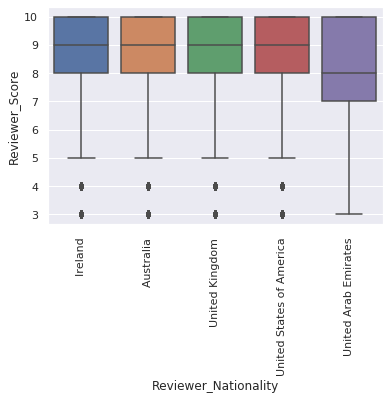

In [0]:
df_smaller = df[df["Reviewer_Nationality"].isin(list_top_nationalities)]
ax = sns.boxplot(x="Reviewer_Nationality", y="Reviewer_Score", data=df_smaller)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


In [0]:
df_plot = df_smaller.groupby(["Reviewer_Nationality","Reviewer_Score"]).size().to_frame("size")

In [0]:
df_plot = df_plot.reset_index()

In [0]:
df_plot

,Reviewer_Nationality,Reviewer_Score,size
0,Australia,3,153
1,Australia,4,250
2,Australia,5,733
3,Australia,6,964
4,Australia,7,1598
5,Australia,8,4736
6,Australia,9,4583
7,Australia,10,8669
8,Ireland,3,130
9,Ireland,4,202


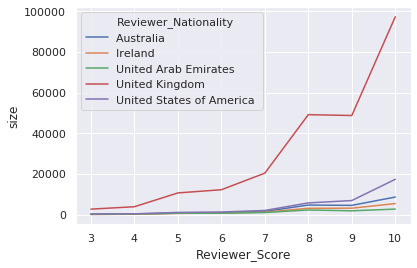

In [0]:
ax = sns.lineplot(x="Reviewer_Score", y="size", hue="Reviewer_Nationality",
                  data=df_plot)

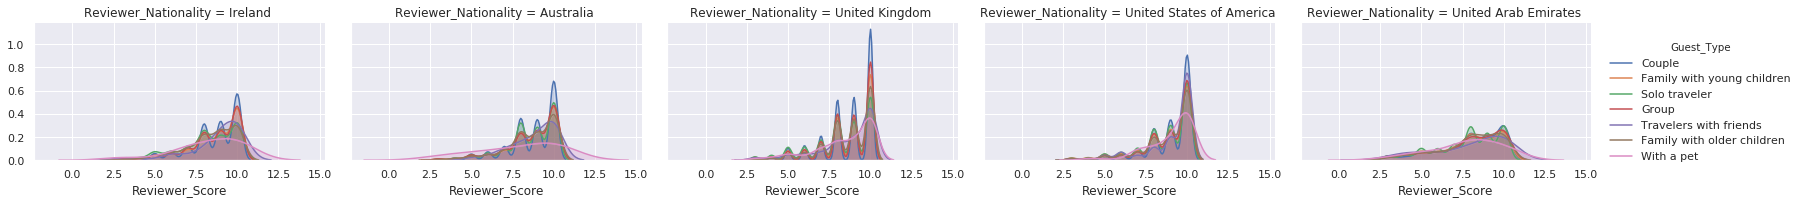

In [0]:
#Are there differences in the scores given by reviewers from different nationalities and different Guest Type
g = sns.FacetGrid(df_smaller, col="Reviewer_Nationality", hue = 'Guest_Type', aspect=1.5)
g.map(sns.kdeplot, 'Reviewer_Score', shade=True)
g.add_legend()
plt.show()

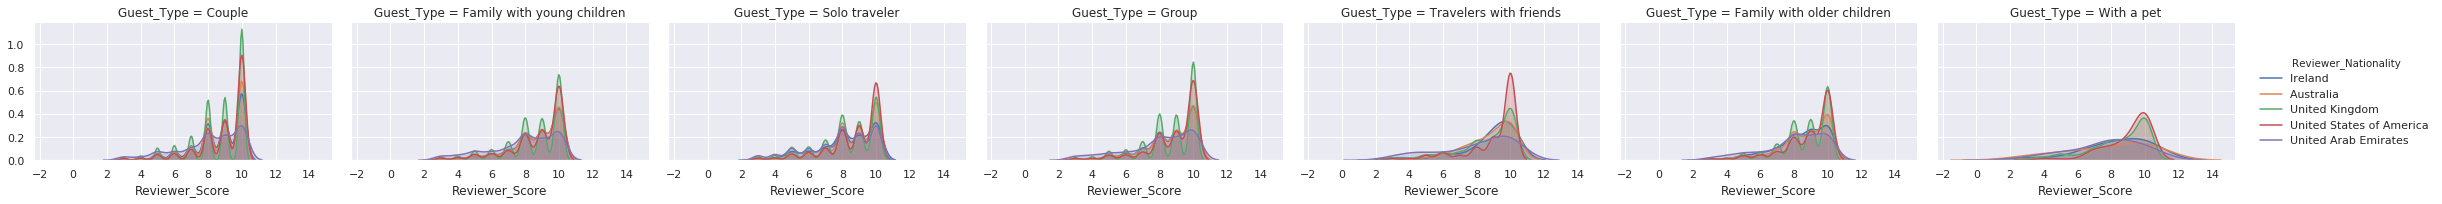

In [0]:
#Are there differences in the scores given by reviewers from different nationalities and different Guest Type
g = sns.FacetGrid(df_smaller, col="Guest_Type", hue = 'Reviewer_Nationality', aspect=1.5)
g.map(sns.kdeplot, 'Reviewer_Score', shade=True)
g.add_legend()
plt.show()

### 7. What information do we have regarding date?

In [0]:
df["Review_Date"]

0         20170803
1         20170803
2         20170731
3         20170731
4         20170724
            ...   
515733    20150830
515734    20150822
515735    20150819
515736    20150817
515737    20150809
Name: Review_Date, Length: 515738, dtype: int64

In [0]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'].astype(str), format='%Y%m%d')

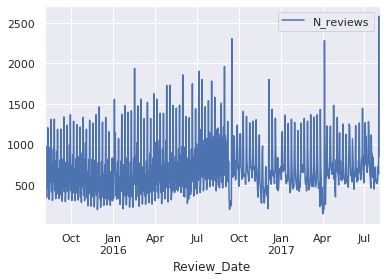

In [0]:
df.groupby('Review_Date').size().to_frame("N_reviews").plot()

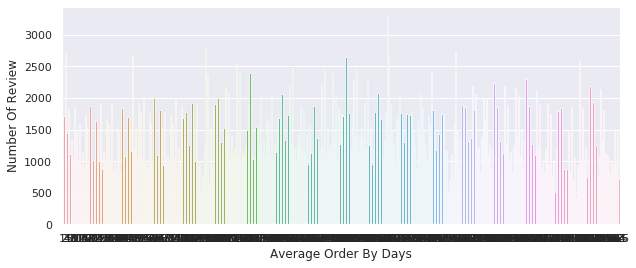

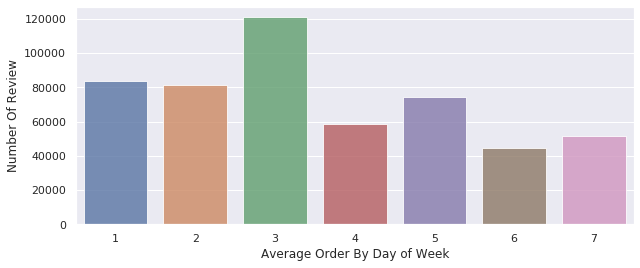

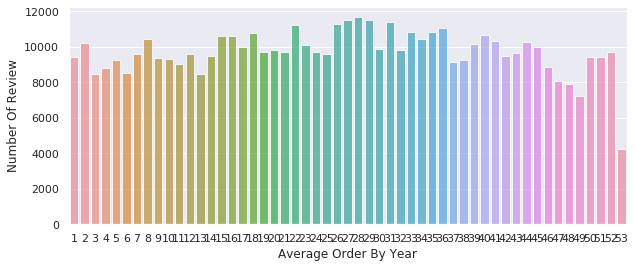

In [0]:
#Reviews Entry - Day of Year/ Day of Week / Week of Year

Review_Day_Count = df['Day_of_Year'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(Review_Day_Count.index, Review_Day_Count.values, alpha=0.8)
plt.ylabel("Number Of Review")
plt.xlabel("Day of Year", rotate=45)
plt.show()

Reviews_Count_Month = df['Day_of_Week'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(Reviews_Count_Month.index, Reviews_Count_Month.values, alpha=0.8)
plt.ylabel("Number Of Review")
plt.xlabel("Day of Week")
plt.show()

Reviews_Year =df['Week_of_Year'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(Reviews_Year.index, Reviews_Year.values, alpha=0.8)
plt.ylabel("Number Of Review")
plt.xlabel("Week of Year")
plt.show()

### 8. Which hotel would you recommend to a couple on vacation? (Simplest approach)

In [0]:
df['Guest_Type'].value_counts()

Couple                        251554
Solo traveler                 108336
Group                          65392
Family with young children     60791
Family with older children     26258
Travelers with friends          2143
With a pet                      1264
Name: Guest_Type, dtype: int64

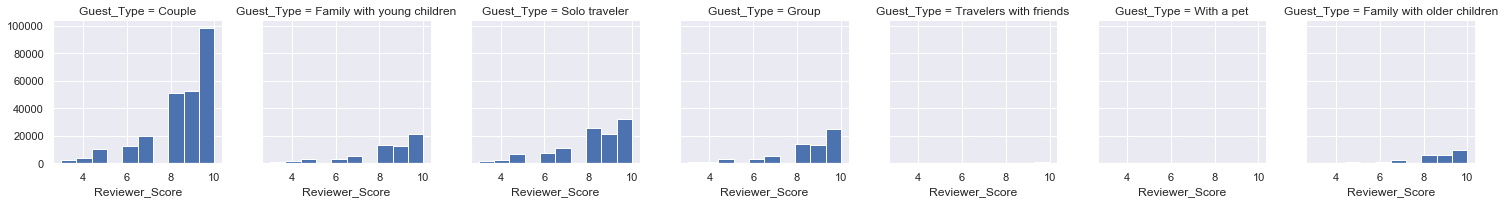

In [0]:
fg = sns.FacetGrid(df, col='Guest_Type')
fg = fg.map(plt.hist, 'Reviewer_Score')

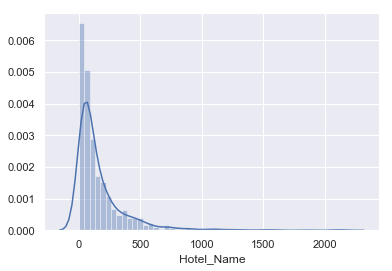

In [0]:
hotel_count = df[df['Guest_Type'] == 'Couple']['Hotel_Name'].value_counts()
sns.distplot(hotel_count);

We will filter hotels with less than 100 reviews

In [0]:
hotel_names = hotel_count[hotel_count > 100].index
hotel_names.shape

(692,)

In [0]:
df_couple = df[(df['Guest_Type'] == 'Couple') & df['Hotel_Name'].isin(hotel_names)]

In [0]:
# This will return the index of the best reviewed hotel
means = df_couple.groupby(['Hotel_Name'])['Reviewer_Score'].mean()
print(f'Hotel: {means.idxmax()}')
print(f'Avg score: {means.max()}')

Hotel: Hotel Casa Camper
Avg score: 9.838541666666666
